In [19]:
import pandas as pd
import json

# Path to your JSON file
file_path = 'cleaned_links.json'

# Read the JSON file
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Ensure it's a list of entries
if isinstance(data, list):
    first_1000 = data[:1000]
    df = pd.DataFrame(first_1000)
else:
    raise ValueError("JSON root is not a list. Please check the structure.")

# Display the DataFrame
print(df.head())

# Optional: Save to CSV
df.to_csv('first_1000_entries.csv', index=False)


        timestamp                                       original_url  \
0  20090201185911                               http://dunya.com:80/   
1  20220817155415                          https://www.dunya.com/%22   
2  20160318194505    http://www.dunya.com/%22%3ed%c3%bcnya%3c/option   
3  20150412133546  http://www.dunya.com/%22data:image/jpeg;base64...   
4  20141018190120  http://www.dunya.com/%22data:image/jpeg;base64...   

                                         wayback_url  \
0  https://web.archive.org/web/20090201185911/htt...   
1  https://web.archive.org/web/20220817155415/htt...   
2  https://web.archive.org/web/20160318194505/htt...   
3  https://web.archive.org/web/20150412133546/htt...   
4  https://web.archive.org/web/20141018190120/htt...   

                                     wayback_raw_url  
0  https://web.archive.org/web/20090201185911id_/...  
1  https://web.archive.org/web/20220817155415id_/...  
2  https://web.archive.org/web/20160318194505id_/...  
3  https:/

In [30]:
import json
import re

# Step 1: Load JSON file
with open("dunya_2009_2025_links_with_wayback.json", "r", encoding="utf-8") as f:
    data = json.load(f)  # assuming a list of dicts

# Step 2: Updated filter to remove anything containing '/haberleri/' 
# optionally followed by ?page=... or other query
pattern = re.compile(r"haberleri/(\?.*)?$")

cleaned_data = [
    item for item in data
    if not pattern.search(item.get("wayback_raw_url", ""))
]

# Step 2.5: Filter the dictionaries
cleaned_data = [
    item for item in cleaned_data
    if not item.get("wayback_raw_url", "").endswith("haberleri")
]

# Step 3: Stats
removed_count = len(data) - len(cleaned_data)
print(f"Removed links: {removed_count}")
print(f"Remaining (valid) links: {len(cleaned_data)}")

# Step 4: Save cleaned data
with open("dunya_2009_2025_links_with_wayback_cleaned_links.json", "w", encoding="utf-8") as f:
    json.dump(cleaned_data, f, ensure_ascii=False, indent=2)


Removed links: 17600
Remaining (valid) links: 1308106


C:\Users\oktem\AppData\Local\Temp\ipykernel_10044\1433160188.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\oktem\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


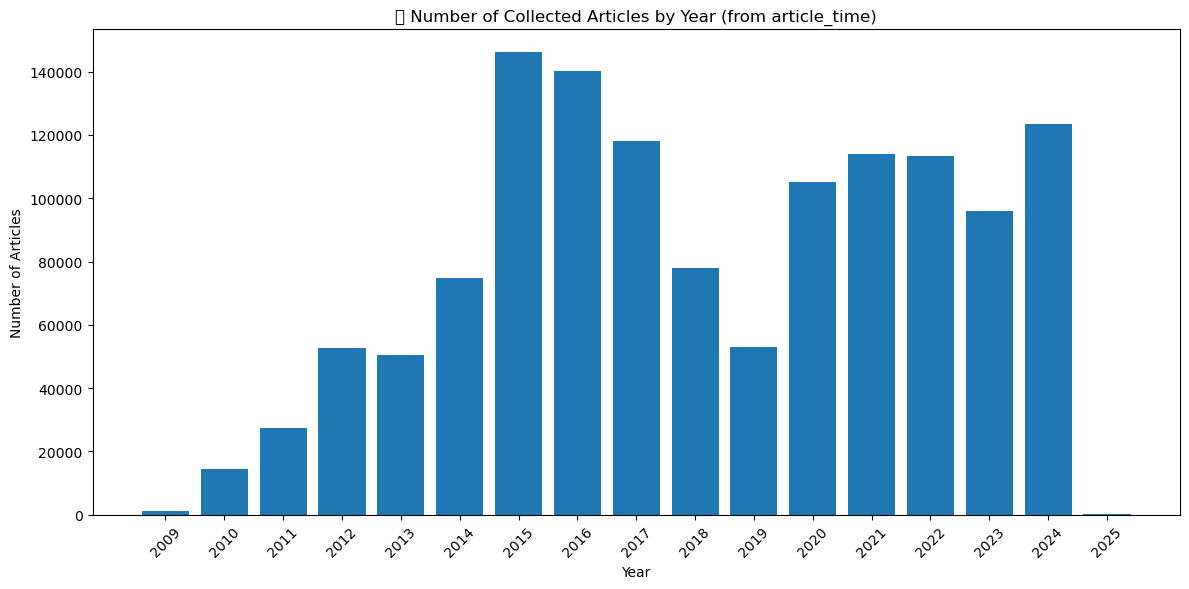

In [32]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load enriched articles
with open("dunya_2009_2025_links_with_wayback_cleaned_links.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Extract year from article_time or timestamp
years = []
for entry in data:
    atime = entry.get("article_time", "")
    if atime.startswith("Giriş:"):
        parts = atime.split()
        if len(parts) >= 4 and parts[3].isdigit():
            years.append(parts[3])
    elif "timestamp" in entry and entry["timestamp"][:4].isdigit():
        years.append(entry["timestamp"][:4])

# Count articles per year
year_counts = Counter(years)
sorted_years = sorted(year_counts.items())

# Plot
labels, values = zip(*sorted_years)
plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.title("📊 Number of Collected Articles by Year (from article_time)")
plt.tight_layout()
plt.show()